In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
import os
import yfinance as yf

# List of stock tickers
tickers = ["AMZN", "AAPL", "NVDA", "MSFT", "GOOG", "META", "TSLA", "WMT", "JPM", "NFLX"]

# Directory to save the CSV files (raw_data folder is one level up from main_code)
output_dir = "../raw_data"  # Adjusted to go one level up to access the raw_data folder
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

# Start and end dates for the data
start_date = "2016-01-01"
end_date = "2024-12-01"

# Fetch data for each ticker and save to CSV
for ticker in tickers:
    print(f"Fetching data for {ticker} from {start_date} to {end_date}...")
    stock = yf.Ticker(ticker)
    # Fetch historical data for the specified date range
    stock_data = stock.history(start=start_date, end=end_date)
    
    # File path to save the data in raw_data folder
    file_path = os.path.join(output_dir, f"data{ticker}.csv")
    
    # Save to CSV
    stock_data.to_csv(file_path)
    print(f"Data for {ticker} saved to {file_path}")

print("All stock data saved successfully!")


Fetching data for AMZN from 2016-01-01 to 2024-12-01...
Data for AMZN saved to ../raw_data\dataAMZN.csv
Fetching data for AAPL from 2016-01-01 to 2024-12-01...
Data for AAPL saved to ../raw_data\dataAAPL.csv
Fetching data for NVDA from 2016-01-01 to 2024-12-01...
Data for NVDA saved to ../raw_data\dataNVDA.csv
Fetching data for MSFT from 2016-01-01 to 2024-12-01...
Data for MSFT saved to ../raw_data\dataMSFT.csv
Fetching data for GOOG from 2016-01-01 to 2024-12-01...
Data for GOOG saved to ../raw_data\dataGOOG.csv
Fetching data for META from 2016-01-01 to 2024-12-01...
Data for META saved to ../raw_data\dataMETA.csv
Fetching data for TSLA from 2016-01-01 to 2024-12-01...
Data for TSLA saved to ../raw_data\dataTSLA.csv
Fetching data for WMT from 2016-01-01 to 2024-12-01...
Data for WMT saved to ../raw_data\dataWMT.csv
Fetching data for JPM from 2016-01-01 to 2024-12-01...
Data for JPM saved to ../raw_data\dataJPM.csv
Fetching data for NFLX from 2016-01-01 to 2024-12-01...
Data for NFLX 

In [4]:
# List of stock symbols
stock_symbols = ["AMZN", "AAPL", "NVDA", "MSFT", "GOOG", "META", "TSLA", "WMT", "JPM", "NFLX"]  # Extend this list as needed
stock = {}

# Dynamically construct file path and load the data for each stock symbol
for symbol in stock_symbols:
    file_path = f"../raw_data/data{symbol}.csv"  # Dynamically generate file path
    stock[symbol] = pd.read_csv(file_path)
    stock[symbol] = stock[symbol].drop(columns=["Dividends", "Stock Splits"])
# Apply EWMA to the Close column for each stock symbol
for i in range(len(stock_symbols)):
    stock[stock_symbols[i]]['Close'] = stock[stock_symbols[i]]['Close'].ewm(alpha=0.65).mean()

# Display the first few rows of the modified data for the first stock symbol
stock[stock_symbols[0]].head()

,Date,Open,High,Low,Close,Volume
0,2016-01-04 00:00:00-05:00,32.814499,32.886002,31.375500,31.849501,186290000
1,2016-01-05 00:00:00-05:00,32.342999,32.345501,31.382500,31.730982,116452000
2,2016-01-06 00:00:00-05:00,31.100000,31.989500,31.015499,31.664101,106584000
3,2016-01-07 00:00:00-05:00,31.090000,31.500000,30.260500,30.827937,141498000
4,2016-01-08 00:00:00-05:00,30.983000,31.207001,30.299999,30.517272,110258000


In [5]:
for i in range(len(stock_symbols)):
  stock[stock_symbols[i]]['today'] = stock[stock_symbols[i]]['Close'].pct_change() * 100

stock[stock_symbols[0]].head()

,Date,Open,High,Low,Close,Volume,today
0,2016-01-04 00:00:00-05:00,32.814499,32.886002,31.375500,31.849501,186290000,NaN
1,2016-01-05 00:00:00-05:00,32.342999,32.345501,31.382500,31.730982,116452000,-0.372120
2,2016-01-06 00:00:00-05:00,31.100000,31.989500,31.015499,31.664101,106584000,-0.210776
3,2016-01-07 00:00:00-05:00,31.090000,31.500000,30.260500,30.827937,141498000,-2.640731
4,2016-01-08 00:00:00-05:00,30.983000,31.207001,30.299999,30.517272,110258000,-1.007740


In [6]:
for i in range(len(stock_symbols)):
  for j in range(1, 6):
    stock[stock_symbols[i]][f'previous{str(j)}'] = stock[stock_symbols[i]]['today'].shift(j)

stock[stock_symbols[0]].head()

,Date,Open,High,Low,Close,Volume,today,previous1,previous2,previous3,previous4,previous5
0,2016-01-04 00:00:00-05:00,32.814499,32.886002,31.375500,31.849501,186290000,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-05 00:00:00-05:00,32.342999,32.345501,31.382500,31.730982,116452000,-0.372120,NaN,NaN,NaN,NaN,NaN
2,2016-01-06 00:00:00-05:00,31.100000,31.989500,31.015499,31.664101,106584000,-0.210776,-0.372120,NaN,NaN,NaN,NaN
3,2016-01-07 00:00:00-05:00,31.090000,31.500000,30.260500,30.827937,141498000,-2.640731,-0.210776,-0.372120,NaN,NaN,NaN
4,2016-01-08 00:00:00-05:00,30.983000,31.207001,30.299999,30.517272,110258000,-1.007740,-2.640731,-0.210776,-0.37212,NaN,NaN


In [7]:
for i in range(len(stock_symbols)):
  stock[stock_symbols[i]]['ema50'] = stock[stock_symbols[i]]['Close'] / stock[stock_symbols[i]]['Close'].ewm(50).mean()
  stock[stock_symbols[i]]['ema21'] = stock[stock_symbols[i]]['Close'] / stock[stock_symbols[i]]['Close'].ewm(21).mean()
  stock[stock_symbols[i]]['ema14'] = stock[stock_symbols[i]]['Close'] / stock[stock_symbols[i]]['Close'].ewm(14).mean()
  stock[stock_symbols[i]]['ema5'] = stock[stock_symbols[i]]['Close'] / stock[stock_symbols[i]]['Close'].ewm(5).mean()

stock[stock_symbols[0]].head()

,Date,Open,High,Low,Close,Volume,today,previous1,previous2,previous3,previous4,previous5,ema50,ema21,ema14,ema5
0,2016-01-04 00:00:00-05:00,32.814499,32.886002,31.375500,31.849501,186290000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000
1,2016-01-05 00:00:00-05:00,32.342999,32.345501,31.382500,31.730982,116452000,-0.372120,NaN,NaN,NaN,NaN,NaN,0.998154,0.998179,0.998200,0.998305
2,2016-01-06 00:00:00-05:00,31.100000,31.989500,31.015499,31.664101,106584000,-0.210776,-0.372120,NaN,NaN,NaN,NaN,0.997390,0.997441,0.997485,0.997700
3,2016-01-07 00:00:00-05:00,31.090000,31.500000,30.260500,30.827937,141498000,-2.640731,-0.210776,-0.372120,NaN,NaN,NaN,0.978343,0.978673,0.978953,0.980394
4,2016-01-08 00:00:00-05:00,30.983000,31.207001,30.299999,30.517272,110258000,-1.007740,-2.640731,-0.210776,-0.37212,NaN,NaN,0.974875,0.975474,0.975981,0.978555


In [8]:
def rsi(X, window=14):
  delta = X.diff(1)

  gains = delta.where(delta > 0, 0)
  losses = -delta.where(delta < 0, 0)

  avg_gains = gains.rolling(window=window, min_periods=1).mean()
  avg_losses = losses.rolling(window=window, min_periods=1).mean()

  rs = avg_gains / avg_losses
  rsi = 100 - (100 / (1 + rs))

  return rsi

In [9]:
for i in range(len(stock_symbols)):
  stock[stock_symbols[i]]['rsi'] = rsi(stock[stock_symbols[i]]['Close'])

stock[stock_symbols[0]].head()

,Date,Open,High,Low,Close,Volume,today,previous1,previous2,previous3,previous4,previous5,ema50,ema21,ema14,ema5,rsi
0,2016-01-04 00:00:00-05:00,32.814499,32.886002,31.375500,31.849501,186290000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN
1,2016-01-05 00:00:00-05:00,32.342999,32.345501,31.382500,31.730982,116452000,-0.372120,NaN,NaN,NaN,NaN,NaN,0.998154,0.998179,0.998200,0.998305,0.0
2,2016-01-06 00:00:00-05:00,31.100000,31.989500,31.015499,31.664101,106584000,-0.210776,-0.372120,NaN,NaN,NaN,NaN,0.997390,0.997441,0.997485,0.997700,0.0
3,2016-01-07 00:00:00-05:00,31.090000,31.500000,30.260500,30.827937,141498000,-2.640731,-0.210776,-0.372120,NaN,NaN,NaN,0.978343,0.978673,0.978953,0.980394,0.0
4,2016-01-08 00:00:00-05:00,30.983000,31.207001,30.299999,30.517272,110258000,-1.007740,-2.640731,-0.210776,-0.37212,NaN,NaN,0.974875,0.975474,0.975981,0.978555,0.0


In [10]:
def macd(X, short_window=12, long_window=29, signal=9):
  short_ema = X.ewm(span=short_window, adjust=False).mean()

  long_ema = X.ewm(span=long_window, adjust=False).mean()

  macd = short_ema - long_ema

  signal = macd.ewm(span=signal, adjust=False).mean()

  return signal

In [11]:
for i in range(len(stock_symbols)):
  stock[stock_symbols[i]]['macd'] = macd(stock[stock_symbols[i]]['Close'])

stock[stock_symbols[0]].head()

,Date,Open,High,Low,Close,Volume,today,previous1,previous2,previous3,previous4,previous5,ema50,ema21,ema14,ema5,rsi,macd
0,2016-01-04 00:00:00-05:00,32.814499,32.886002,31.375500,31.849501,186290000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,0.000000
1,2016-01-05 00:00:00-05:00,32.342999,32.345501,31.382500,31.730982,116452000,-0.372120,NaN,NaN,NaN,NaN,NaN,0.998154,0.998179,0.998200,0.998305,0.0,-0.002066
2,2016-01-06 00:00:00-05:00,31.100000,31.989500,31.015499,31.664101,106584000,-0.210776,-0.372120,NaN,NaN,NaN,NaN,0.997390,0.997441,0.997485,0.997700,0.0,-0.006497
3,2016-01-07 00:00:00-05:00,31.090000,31.500000,30.260500,30.827937,141498000,-2.640731,-0.210776,-0.372120,NaN,NaN,NaN,0.978343,0.978673,0.978953,0.980394,0.0,-0.026763
4,2016-01-08 00:00:00-05:00,30.983000,31.207001,30.299999,30.517272,110258000,-1.007740,-2.640731,-0.210776,-0.37212,NaN,NaN,0.974875,0.975474,0.975981,0.978555,0.0,-0.061379


In [12]:
window = 6
for i in range(len(stock_symbols)):
  stock[stock_symbols[i]]['roc'] = ((stock[stock_symbols[i]]['Close'] - stock[stock_symbols[i]]['Close'].shift(window)) / stock[stock_symbols[i]]['Close'].shift(window)) * 100

stock[stock_symbols[0]].head()

,Date,Open,High,Low,Close,Volume,today,previous1,previous2,previous3,previous4,previous5,ema50,ema21,ema14,ema5,rsi,macd,roc
0,2016-01-04 00:00:00-05:00,32.814499,32.886002,31.375500,31.849501,186290000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,NaN
1,2016-01-05 00:00:00-05:00,32.342999,32.345501,31.382500,31.730982,116452000,-0.372120,NaN,NaN,NaN,NaN,NaN,0.998154,0.998179,0.998200,0.998305,0.0,-0.002066,NaN
2,2016-01-06 00:00:00-05:00,31.100000,31.989500,31.015499,31.664101,106584000,-0.210776,-0.372120,NaN,NaN,NaN,NaN,0.997390,0.997441,0.997485,0.997700,0.0,-0.006497,NaN
3,2016-01-07 00:00:00-05:00,31.090000,31.500000,30.260500,30.827937,141498000,-2.640731,-0.210776,-0.372120,NaN,NaN,NaN,0.978343,0.978673,0.978953,0.980394,0.0,-0.026763,NaN
4,2016-01-08 00:00:00-05:00,30.983000,31.207001,30.299999,30.517272,110258000,-1.007740,-2.640731,-0.210776,-0.37212,NaN,NaN,0.974875,0.975474,0.975981,0.978555,0.0,-0.061379,NaN


In [13]:
window = 16
for i in range(len(stock_symbols)):
  stock[stock_symbols[i]]['high-low'] = stock[stock_symbols[i]]['High'] - stock[stock_symbols[i]]['Low']
  stock[stock_symbols[i]]['high-preclose'] = abs(stock[stock_symbols[i]]['High'] - stock[stock_symbols[i]]['Close'].shift(1))
  stock[stock_symbols[i]]['low-preclose'] = abs(stock[stock_symbols[i]]['Low'] - stock[stock_symbols[i]]['Close'].shift(1))

  stock[stock_symbols[i]]['tr'] = stock[stock_symbols[i]][['high-low', 'high-preclose', 'low-preclose']].max(axis=1)

  stock[stock_symbols[i]]['atr'] = stock[stock_symbols[i]]['tr'].rolling(window=window).mean()

In [14]:
for i in range(len(stock_symbols)):
  stock[stock_symbols[i]] = stock[stock_symbols[i]].drop(['high-low', 'high-preclose', 'low-preclose', 'tr'], axis=1)

stock[stock_symbols[0]].head()

,Date,Open,High,Low,Close,Volume,today,previous1,previous2,previous3,previous4,previous5,ema50,ema21,ema14,ema5,rsi,macd,roc,atr
0,2016-01-04 00:00:00-05:00,32.814499,32.886002,31.375500,31.849501,186290000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,NaN,NaN
1,2016-01-05 00:00:00-05:00,32.342999,32.345501,31.382500,31.730982,116452000,-0.372120,NaN,NaN,NaN,NaN,NaN,0.998154,0.998179,0.998200,0.998305,0.0,-0.002066,NaN,NaN
2,2016-01-06 00:00:00-05:00,31.100000,31.989500,31.015499,31.664101,106584000,-0.210776,-0.372120,NaN,NaN,NaN,NaN,0.997390,0.997441,0.997485,0.997700,0.0,-0.006497,NaN,NaN
3,2016-01-07 00:00:00-05:00,31.090000,31.500000,30.260500,30.827937,141498000,-2.640731,-0.210776,-0.372120,NaN,NaN,NaN,0.978343,0.978673,0.978953,0.980394,0.0,-0.026763,NaN,NaN
4,2016-01-08 00:00:00-05:00,30.983000,31.207001,30.299999,30.517272,110258000,-1.007740,-2.640731,-0.210776,-0.37212,NaN,NaN,0.974875,0.975474,0.975981,0.978555,0.0,-0.061379,NaN,NaN


In [15]:

def obv(X):
    obv = pd.Series(index=X.index)
    obv.iloc[0] = 0

    for i in range(1, len(X)):
        if X['Close'].iloc[i] > X['Close'].iloc[i-1]:
            obv.iloc[i] = obv.iloc[i-1] + X['Volume'].iloc[i]
        elif X['Close'].iloc[i] < X['Close'].iloc[i-1]:
            obv.iloc[i] = obv.iloc[i-1] - X['Volume'].iloc[i]
        else:
            obv.iloc[i] = obv.iloc[i-1]

    return obv


In [16]:
for i in range(len(stock_symbols)):
  stock[stock_symbols[i]]['obv'] = obv(stock[stock_symbols[i]])

stock[stock_symbols[0]].head()

,Date,Open,High,Low,Close,Volume,today,previous1,previous2,previous3,...,previous5,ema50,ema21,ema14,ema5,rsi,macd,roc,atr,obv
0,2016-01-04 00:00:00-05:00,32.814499,32.886002,31.375500,31.849501,186290000,NaN,NaN,NaN,NaN,...,NaN,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,NaN,NaN,0.0
1,2016-01-05 00:00:00-05:00,32.342999,32.345501,31.382500,31.730982,116452000,-0.372120,NaN,NaN,NaN,...,NaN,0.998154,0.998179,0.998200,0.998305,0.0,-0.002066,NaN,NaN,-116452000.0
2,2016-01-06 00:00:00-05:00,31.100000,31.989500,31.015499,31.664101,106584000,-0.210776,-0.372120,NaN,NaN,...,NaN,0.997390,0.997441,0.997485,0.997700,0.0,-0.006497,NaN,NaN,-223036000.0
3,2016-01-07 00:00:00-05:00,31.090000,31.500000,30.260500,30.827937,141498000,-2.640731,-0.210776,-0.372120,NaN,...,NaN,0.978343,0.978673,0.978953,0.980394,0.0,-0.026763,NaN,NaN,-364534000.0
4,2016-01-08 00:00:00-05:00,30.983000,31.207001,30.299999,30.517272,110258000,-1.007740,-2.640731,-0.210776,-0.37212,...,NaN,0.974875,0.975474,0.975981,0.978555,0.0,-0.061379,NaN,NaN,-474792000.0


In [17]:
def cmf(X, window=16):
  money_flow_multiplier = ((X['Close'] - X['Low']) - (X['High'] - X['Close']))/(X['High']-X['Low'])

  money_flow_volume = money_flow_multiplier * X['Volume']

  cmf = money_flow_volume.rolling(window=window).sum() / X['Volume'].rolling(window=window).sum()

  return cmf

In [18]:
for i in range(len(stock_symbols)):
  stock[stock_symbols[i]]['cmf'] = cmf(stock[stock_symbols[i]])

stock[stock_symbols[0]].head()

,Date,Open,High,Low,Close,Volume,today,previous1,previous2,previous3,...,ema50,ema21,ema14,ema5,rsi,macd,roc,atr,obv,cmf
0,2016-01-04 00:00:00-05:00,32.814499,32.886002,31.375500,31.849501,186290000,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,NaN,NaN,0.0,NaN
1,2016-01-05 00:00:00-05:00,32.342999,32.345501,31.382500,31.730982,116452000,-0.372120,NaN,NaN,NaN,...,0.998154,0.998179,0.998200,0.998305,0.0,-0.002066,NaN,NaN,-116452000.0,NaN
2,2016-01-06 00:00:00-05:00,31.100000,31.989500,31.015499,31.664101,106584000,-0.210776,-0.372120,NaN,NaN,...,0.997390,0.997441,0.997485,0.997700,0.0,-0.006497,NaN,NaN,-223036000.0,NaN
3,2016-01-07 00:00:00-05:00,31.090000,31.500000,30.260500,30.827937,141498000,-2.640731,-0.210776,-0.372120,NaN,...,0.978343,0.978673,0.978953,0.980394,0.0,-0.026763,NaN,NaN,-364534000.0,NaN
4,2016-01-08 00:00:00-05:00,30.983000,31.207001,30.299999,30.517272,110258000,-1.007740,-2.640731,-0.210776,-0.37212,...,0.974875,0.975474,0.975981,0.978555,0.0,-0.061379,NaN,NaN,-474792000.0,NaN


In [19]:
def emv(X):
    emv = pd.Series(index=X.index)
    emv.iloc[0] = np.nan  # Set the first value to NaN as there is no previous data for comparison

    for i in range(1, len(X)):
        # Calculate the directional movement (dm)
        dm = 0.5 * ((X['High'].iloc[i] + X['Low'].iloc[i]) - (X['High'].iloc[i-1] + X['Low'].iloc[i-1]))
        
        # Calculate the buying pressure (br)
        br = X['Volume'].iloc[i] / (1000000 * (X['High'].iloc[i] - X['Low'].iloc[i]))

        # Calculate the EMV (Ease of Movement) value
        emv.iloc[i] = dm / br if br != 0 else 0  # Avoid division by zero

    return emv

In [20]:
for i in range(len(stock_symbols)):
  stock[stock_symbols[i]]['emv'] = emv(stock[stock_symbols[i]])

In [21]:
window = 16
for i in range(len(stock_symbols)):
    # Calculate the minimum low and maximum high over the rolling window
    stock[stock_symbols[i]]['minimum_low'] = stock[stock_symbols[i]]['Low'].rolling(window=window).min()
    stock[stock_symbols[i]]['maximum_high'] = stock[stock_symbols[i]]['High'].rolling(window=window).max()

    # Calculate the stochastic oscillator
    stock[stock_symbols[i]]['stoch'] = ((stock[stock_symbols[i]]['Close'] - stock[stock_symbols[i]]['minimum_low']) /
                                        (stock[stock_symbols[i]]['maximum_high'] - stock[stock_symbols[i]]['minimum_low'])) * 100


In [22]:
for i in range(len(stock_symbols)):
  stock[stock_symbols[i]] = stock[stock_symbols[i]].drop(['minimum_low', 'maximum_high'], axis=1)

stock[stock_symbols[0]].head()

,Date,Open,High,Low,Close,Volume,today,previous1,previous2,previous3,...,ema14,ema5,rsi,macd,roc,atr,obv,cmf,emv,stoch
0,2016-01-04 00:00:00-05:00,32.814499,32.886002,31.375500,31.849501,186290000,NaN,NaN,NaN,NaN,...,1.000000,1.000000,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,NaN
1,2016-01-05 00:00:00-05:00,32.342999,32.345501,31.382500,31.730982,116452000,-0.372120,NaN,NaN,NaN,...,0.998200,0.998305,0.0,-0.002066,NaN,NaN,-116452000.0,NaN,-0.002206,NaN
2,2016-01-06 00:00:00-05:00,31.100000,31.989500,31.015499,31.664101,106584000,-0.210776,-0.372120,NaN,NaN,...,0.997485,0.997700,0.0,-0.006497,NaN,NaN,-223036000.0,NaN,-0.003304,NaN
3,2016-01-07 00:00:00-05:00,31.090000,31.500000,30.260500,30.827937,141498000,-2.640731,-0.210776,-0.372120,NaN,...,0.978953,0.980394,0.0,-0.026763,NaN,NaN,-364534000.0,NaN,-0.005451,NaN
4,2016-01-08 00:00:00-05:00,30.983000,31.207001,30.299999,30.517272,110258000,-1.007740,-2.640731,-0.210776,-0.37212,...,0.975981,0.978555,0.0,-0.061379,NaN,NaN,-474792000.0,NaN,-0.001043,NaN


In [23]:
def mfi(X, window=14):
  combine_price = (X['High'] + X['Low'] + X['Close']) / 3

  raw_money_flow = combine_price * X['Volume']

  flow_direction = (combine_price.diff() > 0).astype(int)

  positive_money_flow = flow_direction * raw_money_flow
  negative_money_flow = (1 - flow_direction) * raw_money_flow

  positive = positive_money_flow.rolling(window=window, min_periods=1).sum()
  negative = negative_money_flow.rolling(window=window, min_periods=1).sum()

  mf = positive / negative
  mfi = 100 - (100 / (1 + mf))

  return mfi

In [24]:
for i in range(len(stock_symbols)):
  stock[stock_symbols[i]]['mfi'] = mfi(stock[stock_symbols[i]])

stock[stock_symbols[0]]

,Date,Open,High,Low,Close,Volume,today,previous1,previous2,previous3,...,ema5,rsi,macd,roc,atr,obv,cmf,emv,stoch,mfi
0,2016-01-04 00:00:00-05:00,32.814499,32.886002,31.375500,31.849501,186290000,NaN,NaN,NaN,NaN,...,1.000000,NaN,0.000000,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000
1,2016-01-05 00:00:00-05:00,32.342999,32.345501,31.382500,31.730982,116452000,-0.372120,NaN,NaN,NaN,...,0.998305,0.000000,-0.002066,NaN,NaN,-1.164520e+08,NaN,-0.002206,NaN,0.000000
2,2016-01-06 00:00:00-05:00,31.100000,31.989500,31.015499,31.664101,106584000,-0.210776,-0.372120,NaN,NaN,...,0.997700,0.000000,-0.006497,NaN,NaN,-2.230360e+08,NaN,-0.003304,NaN,0.000000
3,2016-01-07 00:00:00-05:00,31.090000,31.500000,30.260500,30.827937,141498000,-2.640731,-0.210776,-0.372120,NaN,...,0.980394,0.000000,-0.026763,NaN,NaN,-3.645340e+08,NaN,-0.005451,NaN,0.000000
4,2016-01-08 00:00:00-05:00,30.983000,31.207001,30.299999,30.517272,110258000,-1.007740,-2.640731,-0.210776,-0.372120,...,0.978555,0.000000,-0.061379,NaN,NaN,-4.747920e+08,NaN,-0.001043,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,2024-11-22 00:00:00-05:00,198.250000,199.259995,196.750000,198.164227,31530800,-0.969142,-1.574390,-0.386105,0.473286,...,0.978159,54.117715,5.377269,-6.389930,6.163468,1.072268e+10,-0.252650,-0.128562,17.851922,45.329684
2239,2024-11-25 00:00:00-05:00,199.279999,201.949997,199.000000,200.299977,40685700,1.077768,-0.969142,-1.574390,-0.386105,...,0.990566,53.349719,5.041564,-2.667023,5.635208,1.076337e+10,0.058866,0.179092,27.744238,46.202263
2240,2024-11-26 00:00:00-05:00,201.899994,208.000000,201.789993,205.213993,41673700,2.453328,1.077768,-0.969142,-1.574390,...,1.012359,51.973058,4.777445,1.025474,5.927709,1.080504e+10,0.081420,0.658646,46.967719,43.559765
2241,2024-11-27 00:00:00-05:00,206.979996,207.639999,205.050003,205.555901,28061600,0.166611,2.453328,1.077768,-0.969142,...,1.011678,45.951638,4.567989,0.717113,5.810094,1.083310e+10,0.054522,0.133831,48.664536,41.086309


In [25]:
window = 21
for i in range(len(stock_symbols)):
    # Calculate the combined price (average of High, Low, and Close)
    stock[stock_symbols[i]]['combine_price'] = (stock[stock_symbols[i]]['High'] + stock[stock_symbols[i]]['Low'] + stock[stock_symbols[i]]['Close']) / 3

    # Calculate the simple moving average of the combined price
    stock[stock_symbols[i]]['sma_combine_price'] = stock[stock_symbols[i]]['combine_price'].rolling(window=window).mean()

    # Calculate the mean deviation of the combined price
    # Apply custom function to calculate the mean absolute deviation (MAD) for each rolling window
    stock[stock_symbols[i]]['mean_deviation'] = stock[stock_symbols[i]]['combine_price'].rolling(window=window).apply(lambda x: (x - x.mean()).abs().mean(), raw=False)

    # Calculate the Commodity Channel Index (CCI)
    stock[stock_symbols[i]]['cci'] = (stock[stock_symbols[i]]['combine_price'] - stock[stock_symbols[i]]['sma_combine_price']) / (0.015 * stock[stock_symbols[i]]['mean_deviation'])


In [26]:
for i in range(len(stock_symbols)):
  stock[stock_symbols[i]] = stock[stock_symbols[i]].drop(['combine_price', 'sma_combine_price', 'mean_deviation'], axis=1)

stock[stock_symbols[0]].head()

,Date,Open,High,Low,Close,Volume,today,previous1,previous2,previous3,...,rsi,macd,roc,atr,obv,cmf,emv,stoch,mfi,cci
0,2016-01-04 00:00:00-05:00,32.814499,32.886002,31.375500,31.849501,186290000,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
1,2016-01-05 00:00:00-05:00,32.342999,32.345501,31.382500,31.730982,116452000,-0.372120,NaN,NaN,NaN,...,0.0,-0.002066,NaN,NaN,-116452000.0,NaN,-0.002206,NaN,0.0,NaN
2,2016-01-06 00:00:00-05:00,31.100000,31.989500,31.015499,31.664101,106584000,-0.210776,-0.372120,NaN,NaN,...,0.0,-0.006497,NaN,NaN,-223036000.0,NaN,-0.003304,NaN,0.0,NaN
3,2016-01-07 00:00:00-05:00,31.090000,31.500000,30.260500,30.827937,141498000,-2.640731,-0.210776,-0.372120,NaN,...,0.0,-0.026763,NaN,NaN,-364534000.0,NaN,-0.005451,NaN,0.0,NaN
4,2016-01-08 00:00:00-05:00,30.983000,31.207001,30.299999,30.517272,110258000,-1.007740,-2.640731,-0.210776,-0.37212,...,0.0,-0.061379,NaN,NaN,-474792000.0,NaN,-0.001043,NaN,0.0,NaN


In [27]:
for i in range(len(stock_symbols)):
  stock[stock_symbols[i]]['Volume'] = stock[stock_symbols[i]]['Volume'] / stock[stock_symbols[i]]['Volume'].ewm(5).mean()

stock[stock_symbols[0]].head()

,Date,Open,High,Low,Close,Volume,today,previous1,previous2,previous3,...,rsi,macd,roc,atr,obv,cmf,emv,stoch,mfi,cci
0,2016-01-04 00:00:00-05:00,32.814499,32.886002,31.375500,31.849501,1.000000,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
1,2016-01-05 00:00:00-05:00,32.342999,32.345501,31.382500,31.730982,0.785794,-0.372120,NaN,NaN,NaN,...,0.0,-0.002066,NaN,NaN,-116452000.0,NaN,-0.002206,NaN,0.0,NaN
2,2016-01-06 00:00:00-05:00,31.100000,31.989500,31.015499,31.664101,0.809082,-0.210776,-0.372120,NaN,NaN,...,0.0,-0.006497,NaN,NaN,-223036000.0,NaN,-0.003304,NaN,0.0,NaN
3,2016-01-07 00:00:00-05:00,31.090000,31.500000,30.260500,30.827937,1.049086,-2.640731,-0.210776,-0.372120,NaN,...,0.0,-0.026763,NaN,NaN,-364534000.0,NaN,-0.005451,NaN,0.0,NaN
4,2016-01-08 00:00:00-05:00,30.983000,31.207001,30.299999,30.517272,0.861275,-1.007740,-2.640731,-0.210776,-0.37212,...,0.0,-0.061379,NaN,NaN,-474792000.0,NaN,-0.001043,NaN,0.0,NaN


In [28]:
for i in range(len(stock_symbols)):
  stock[stock_symbols[i]].replace(0, np.nan, inplace=True)
  stock[stock_symbols[i]] = stock[stock_symbols[i]].dropna()

stock[stock_symbols[0]].head()

,Date,Open,High,Low,Close,Volume,today,previous1,previous2,previous3,...,rsi,macd,roc,atr,obv,cmf,emv,stoch,mfi,cci
20,2016-02-02 00:00:00-05:00,28.500000,28.577999,27.504499,28.145737,0.827244,-3.445034,-2.542368,-3.362505,5.150732,...,33.685848,-0.629956,-5.198464,1.406489,-9.964700e+08,0.294016,-0.006476,17.313763,29.165044,-132.058746
21,2016-02-03 00:00:00-05:00,27.674999,27.799999,26.094999,27.110782,1.249733,-3.677127,-3.445034,-2.542368,-3.362505,...,34.126514,-0.670712,-9.424864,1.468160,-1.197444e+09,0.273773,-0.009279,17.489376,28.750928,-187.143167
22,2016-02-04 00:00:00-05:00,26.250000,26.949499,25.961000,26.917224,0.802052,-0.713955,-3.677127,-3.445034,-2.542368,...,33.479808,-0.731447,-8.553713,1.497053,-1.321426e+09,0.332923,-0.003925,16.092617,29.220603,-191.933635
23,2016-02-05 00:00:00-05:00,26.464001,26.472500,24.959499,25.740254,1.204096,-4.372553,-0.713955,-3.677127,-3.445034,...,31.862431,-0.820774,-16.835815,1.489036,-1.515604e+09,0.348117,-0.005760,11.244391,28.969036,-210.500401
24,2016-02-08 00:00:00-05:00,24.323500,24.674999,23.760500,24.872339,1.175292,-3.371818,-4.372553,-0.713955,-3.677127,...,29.366903,-0.937123,-16.843829,1.511614,-1.712114e+09,0.429809,-0.006972,13.654766,28.007694,-235.041382


In [29]:
for i in range(len(stock_symbols)):
  stock[stock_symbols[i]]['trend'] = (stock[stock_symbols[i]]['today'].iloc[:] > 0).astype(int)

In [30]:
df = {}
for i in range(len(stock_symbols)):
  df[stock_symbols[i]] = stock[stock_symbols[i]][['today', 'previous1', 'previous2', 'previous3', 'previous4', 'previous5', 'Volume',
                                                  'ema50', 'ema21', 'ema14', 'ema5', 'rsi', 'macd', 'roc', 'atr', 'obv', 'cmf', 'emv', 'stoch', 'mfi', 'cci', 'trend']]

df[stock_symbols[0]].head()

,today,previous1,previous2,previous3,previous4,previous5,Volume,ema50,ema21,ema14,...,macd,roc,atr,obv,cmf,emv,stoch,mfi,cci,trend
20,-3.445034,-2.542368,-3.362505,5.150732,-1.659790,0.817473,0.827244,0.941860,0.945098,0.947519,...,-0.629956,-5.198464,1.406489,-9.964700e+08,0.294016,-0.006476,17.313763,29.165044,-132.058746,0
21,-3.677127,-3.445034,-2.542368,-3.362505,5.150732,-1.659790,1.249733,0.911924,0.916173,0.919533,...,-0.670712,-9.424864,1.468160,-1.197444e+09,0.273773,-0.009279,17.489376,28.750928,-187.143167,0
22,-0.713955,-3.677127,-3.445034,-2.542368,-3.362505,5.150732,0.802052,0.910026,0.915355,0.919677,...,-0.731447,-8.553713,1.497053,-1.321426e+09,0.332923,-0.003925,16.092617,29.220603,-191.933635,0
23,-4.372553,-0.713955,-3.677127,-3.445034,-2.542368,-3.362505,1.204096,0.876128,0.882769,0.888286,...,-0.820774,-16.835815,1.489036,-1.515604e+09,0.348117,-0.005760,11.244391,28.969036,-210.500401,0
24,-3.371818,-4.372553,-0.713955,-3.677127,-3.445034,-2.542368,1.175292,0.853159,0.861375,0.868313,...,-0.937123,-16.843829,1.511614,-1.712114e+09,0.429809,-0.006972,13.654766,28.007694,-235.041382,0


    MODEL : LOGISTIC Regression ( Symbol 0 means AMZN Stock )

In [32]:
X = df[stock_symbols[0]].loc[:, df[stock_symbols[0]].columns != 'trend']
y = df[stock_symbols[0]]['trend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

lr = LogisticRegression(penalty='l2', C=0.1, random_state=42)

lr.fit(X_train_scaled, y_train.values)

LogisticRegression(C=0.1, random_state=42)

In [33]:
predictions = lr.predict(X_test_scaled)
predictions[:21]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [34]:
y_test.values[:21]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [35]:
accuracy = accuracy_score(y_test.values, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


    MODEL : Random Forest 

In [36]:
X = df[stock_symbols[0]][['Volume', 'ema50', 'ema21',
                          'ema14', 'ema5', 'rsi',
                           'macd', 'roc', 'obv',
                            'atr', 'cmf', 'emv',
                             'stoch', 'cci', 'mfi']]
y = df[stock_symbols[0]]['trend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

rf = RandomForestClassifier(n_estimators=110, random_state=21)
rf.fit(X_train.values, y_train.values)

RandomForestClassifier(n_estimators=110, random_state=21)

In [37]:
y_pred = rf.predict(X_test.values)
y_pred[:21]

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [38]:
y_test.values[:21]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [39]:
accuracy = accuracy_score(y_test.values, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


    MODEL: LSTM

In [54]:
X = df[stock_symbols[0]].loc[:, df[stock_symbols[0]].columns != 'trend']
y = df[stock_symbols[0]]['trend']
scale = MinMaxScaler(feature_range=(0,1))
X_scaled = scale.fit_transform(X)

timesteps = 10
feature = X_scaled.shape[1]

test_len = int(len(X_scaled)*0.2)
train_len = X_scaled.shape[0] - test_len

X_train = []
y_train = []

for i in range(timesteps, train_len):
  X_train.append(X_scaled[i-timesteps:i])
  y_train.append(y.values[i])


X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
print("X train dataset shape",X_train.shape)
print("y train dataset shape",y_train.shape)

X_test = []
y_test = []

for i in range(train_len-1, len(X_scaled)):
  X_test.append(X_scaled[i-timesteps: i])
  y_test.append(y.values[i])

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

print("X test dataset shape",X_test.shape)
print("y test dataset shape",y_test.shape)

X train dataset shape (1768, 10, 21)
y train dataset shape (1768,)
X test dataset shape (445, 10, 21)
y test dataset shape (445,)


Epoch 1/15


c:\Users\My Computer\Downloads\DataScienceProject\Data-Science-Stock-Price-Prediction-main\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


199/199 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.2504 - val_loss: 0.2536
Epoch 2/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2460 - val_loss: 0.2535
Epoch 3/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2478 - val_loss: 0.2523
Epoch 4/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.2465 - val_loss: 0.2563
Epoch 5/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2444 - val_loss: 0.2506
Epoch 6/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2455 - val_loss: 0.2485
Epoch 7/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2448 - val_loss: 0.2516
Epoch 8/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2438 - val_loss: 0.2377
Epoch 9/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2447 - val_loss: 0.2341
Epoch 10/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2367 - val_loss: 0.2235
Epoch 11/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2259 - val_loss: 0.2242
Epoch 12/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/ste

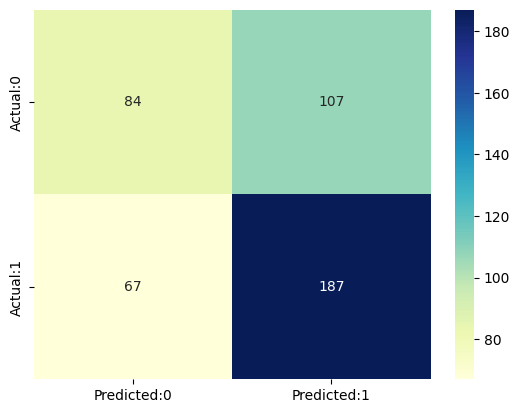

In [61]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# LSTM Model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(timesteps, feature)))
model.add(Dropout(0.1))
model.add(LSTM(64))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=8, validation_split=0.1, verbose=1)

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print("LSTM Model Accuracy:", round(accuracy * 100, 2), "%")

# Confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(pd.DataFrame(cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1']), annot=True, fmt='d', cmap="YlGnBu")
# plt.show()